In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [6]:
logins  = pd.read_json('logins.json')
logins[:5]

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
logins.login_time[:5]

0   1970-01-01 20:13:18
1   1970-01-01 20:16:10
2   1970-01-01 20:16:37
3   1970-01-01 20:16:36
4   1970-01-01 20:26:21
Name: login_time, dtype: datetime64[ns]

In [0]:
logins['log_time'] = pd.to_datetime(logins['login_time'])

In [9]:
logs=logins.set_index(logins.columns[0])
logs[:5]

,log_time
login_time,
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21


In [10]:
logs['counts'] = 1
logs[:5]

,log_time,counts
login_time,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1
1970-01-01 20:16:10,1970-01-01 20:16:10,1
1970-01-01 20:16:37,1970-01-01 20:16:37,1
1970-01-01 20:16:36,1970-01-01 20:16:36,1
1970-01-01 20:26:21,1970-01-01 20:26:21,1


In [11]:
# counts every 15 min
ct_sum = logs.resample('15T').sum()
ct_sum[:5]

,counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


# CHECK/GRAPH COUNTS AT VARIOUS TIME INTERVALS

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


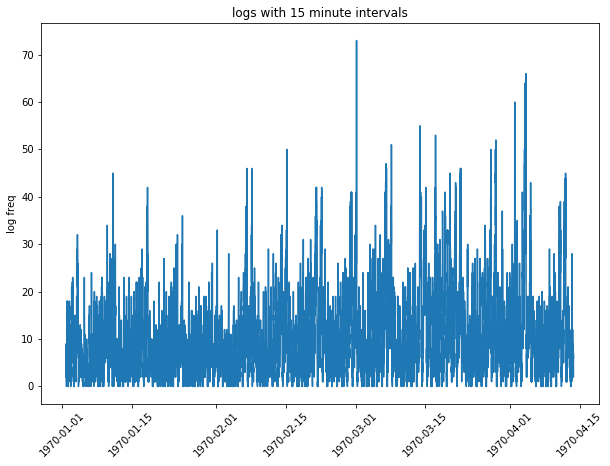

In [12]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=45)
plt.ylabel('log freq')
plt.title('logs with 15 minute intervals')
plt.plot(ct_sum)

In [0]:
ct_sum['dt'] = ct_sum.index
ct_sum['dt'] = pd.to_datetime(ct_sum.dt)

In [0]:
ct_sum['day'] = ct_sum.index.dayofweek

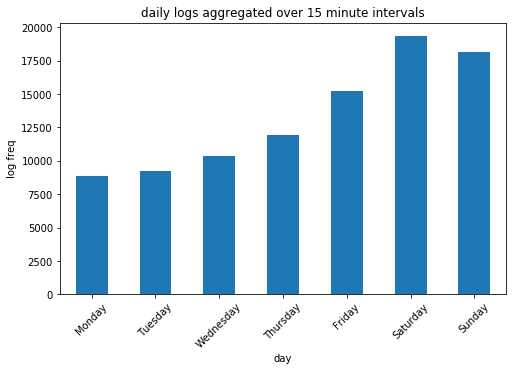

In [15]:
#logins on a daily basis
plt.figure(figsize=(8,5))
ct_sum.groupby('day')['counts'].sum().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6], 
           ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.ylabel('log freq')
plt.title('daily logs aggregated over 15 minute intervals')
plt.show()
# a demand cycle emerges as the graph may indicate a strong 
# preference during customer availability
# given the amount of data, there is indication of a product
# while customers spend more time with the product on weekends

In [0]:
ct_sum['month'] = ct_sum.index.month

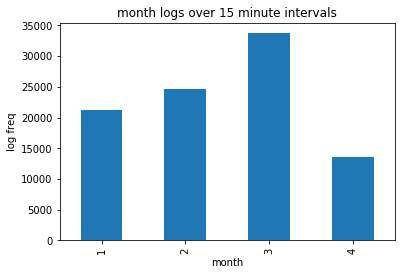

In [17]:
ct_sum.groupby('month')['counts'].sum().plot(kind='bar')
plt.ylabel('log freq')
plt.title('month logs over 15 minute intervals')
plt.show()

# march demand is highest
# 4 month data is not much to conclude about an online product
# except that there exists demand for it

In [0]:
ct_sum['hour'] = ct_sum.index.hour

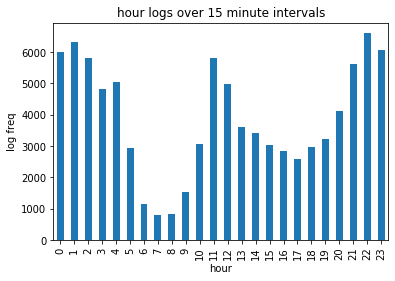

In [19]:
ct_sum.groupby('hour')['counts'].sum().plot(kind='bar')
plt.ylabel('log freq')
plt.title('hour logs over 15 minute intervals')
plt.show()

# demand is multimodal, at least, within the given time period
# of 4 months, this distribution may indicate
# a product with some recurring cycle 
# the ebbs and flows may it quite evident that the product
# is not a complete flop

## THE END 

In [0]:
import json

In [0]:
# list of dictionaries, reason why read_json doesn't work 

with open('ultimate_data_challenge.json') as dta:
  dt = json.load(dta)
dta.close()

In [22]:
df = pd.DataFrame(dt)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [23]:
df.loc[134]

city                      King's Landing
trips_in_first_30_days                 0
signup_date                   2014-01-10
avg_rating_of_driver                   5
avg_surge                              1
last_trip_date                2014-06-11
phone                               None
surge_pct                              0
ultimate_black_user                False
weekday_pct                          100
avg_dist                            2.88
avg_rating_by_driver                   5
Name: 134, dtype: object

In [24]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [25]:
pd.isna(df.loc[134][6])

True

In [0]:
#cp = df.copy()

In [0]:
# reassigning values of None type to 'unknown'
mask = df.applymap(lambda x: x is None)
cols = df.columns[(mask).any()]
for col in df[cols]:
    df.loc[mask[col], col] = 'unknown'

In [0]:
# reassigning nans 

#string = cp.fillna('unknown')
df = df.fillna('unknown')

In [0]:
# round ratings to act more like classifiers 

known = []
for i in df['avg_rating_of_driver']: 
  try:
    x = round(i)
    known.append(x)
  except Exception as e:
    known.append(i)

In [0]:
df['avg_rating_of_driver'] = pd.Series(known)

In [31]:
# true, false, wk_pct objects will take too much time and labor for data exploration
# but if time could afford, there is certainly much knowledge to 
# discover in this data set

true = df[df.ultimate_black_user == True]
true.shape

(18854, 12)

In [32]:
false = df[df.ultimate_black_user == False]
false.shape

(31146, 12)

In [33]:
wk_pct = true[true.weekday_pct == 0]
wk_pct.head()
# .08 are an ultimate_black_user when weekday_pct == 0

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
60,Astapor,1,2014-01-04,unknown,1.00,2014-01-05,iPhone,0.0,True,0.0,3.01,5
68,King's Landing,0,2014-01-01,5,1.00,2014-06-15,iPhone,0.0,True,0.0,4.44,5
89,Astapor,0,2014-01-19,5,1.00,2014-05-18,iPhone,0.0,True,0.0,4.67,5
94,Astapor,1,2014-01-17,1,1.00,2014-01-18,iPhone,0.0,True,0.0,23.34,4
127,Winterfell,2,2014-01-19,4,1.38,2014-06-28,Android,50.0,True,0.0,2.92,5


In [0]:
# convert to datetime 

df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [0]:
# boolean defined column. active users w/ last trip date '2014-05-17'

df['active'] = (df.last_trip_date > '2014-05-17').astype(int)
#df['active'].head(10)

In [0]:
# feature generation of a var defined the following difference
# this var actually proved to be important in modeling thus 
# diminishing importance of all other feautures
# but when removed performance was better

df['t_delta'] = pd.Series(df['last_trip_date'] - df['signup_date']).dt.days

In [37]:
len(df[(df['active']==1) & (df['t_delta'] < 108)])
# days >=108, 25 users who are active with 108 days activity
# no active users exist with < 108 days activity ~ 3.6 months

25

In [38]:
# objects of graphing exploration

act = df[df['active'] ==1]
inact = df[df['active']==0]
# 22745 rows 'active' ==1
act.city.value_counts()

Winterfell        10050
King's Landing     6832
Astapor            5863
Name: city, dtype: int64

In [0]:
import seaborn as sns

Text(0.5, 1.0, 'active users in all 3 cities')

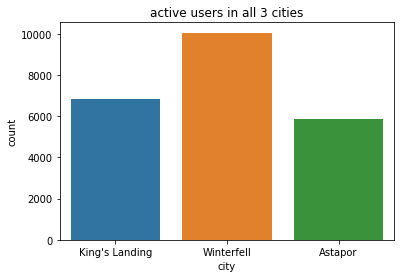

In [41]:
sns.countplot(x='city', data=act)
plt.title('active users in all 3 cities')

Text(0.5, 1.0, 'active users phone brand in all 3 cities')

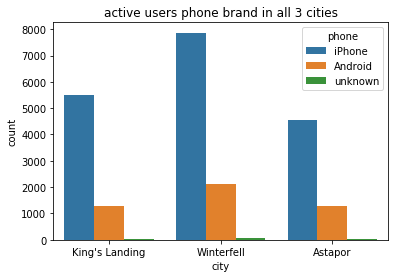

In [44]:
sns.countplot(x = 'city', hue='phone', data=act)
plt.title('active users phone brand in all 3 cities')

Text(0.5, 1.0, 'inactive users phone brand in all 3 cities')

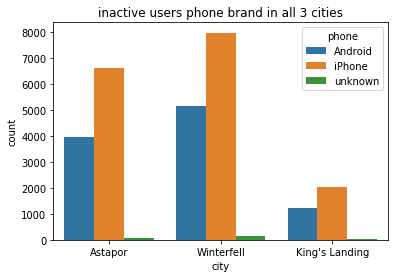

In [45]:
sns.countplot(x = 'city', hue='phone', data=inact)
plt.title('inactive users phone brand in all 3 cities')

In [0]:
# phone should be a good predictor, android is not much of a competitor 
# with iphone because they win in all 3 cities but the iphone
# seems to be a defining characteristic of active users 

# things to do, check collinearity

#LABEL ENCODING

In [0]:
from sklearn import preprocessing as pp

In [0]:
encoder = pp.LabelEncoder()

In [0]:
##string['city_labs'] = encoder.fit_transform(string['city'])
df['city_labs'] = encoder.fit_transform(df['city'])

In [49]:
encoder.classes_

array(['Astapor', "King's Landing", 'Winterfell'], dtype=object)

In [50]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,t_delta,city_labs
0,King's Landing,4,2014-01-25,5,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5,1,143,1
1,Astapor,0,2014-01-29,5,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5,0,96,0
2,Astapor,3,2014-01-06,4,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5,0,1,0
3,King's Landing,9,2014-01-10,5,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,170,1
4,Winterfell,14,2014-01-27,4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,47,2


In [0]:
df['binary_ultimate'] = df['ultimate_black_user'].astype('int')

In [52]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,t_delta,city_labs,binary_ultimate
0,King's Landing,4,2014-01-25,5,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5,1,143,1,1
1,Astapor,0,2014-01-29,5,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5,0,96,0,0
2,Astapor,3,2014-01-06,4,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5,0,1,0,0
3,King's Landing,9,2014-01-10,5,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,170,1,1
4,Winterfell,14,2014-01-27,4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,47,2,0


In [0]:
enc = pp.LabelEncoder()

In [0]:
df['phone_labs'] = enc.fit_transform(df['phone'])

In [55]:
enc.classes_

array(['Android', 'iPhone', 'unknown'], dtype=object)

In [56]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,t_delta,city_labs,binary_ultimate,phone_labs
0,King's Landing,4,2014-01-25,5,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5,1,143,1,1,1
1,Astapor,0,2014-01-29,5,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5,0,96,0,0,0
2,Astapor,3,2014-01-06,4,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5,0,1,0,0,1
3,King's Landing,9,2014-01-10,5,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,170,1,1,1
4,Winterfell,14,2014-01-27,4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,47,2,0,0


In [0]:
encode = pp.LabelEncoder()

In [0]:
df.loc[df['avg_rating_of_driver']== 'unknown', 'avg_rating_of_driver'] = 0

In [59]:
df[100:110]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,t_delta,city_labs,binary_ultimate,phone_labs
100,Astapor,0,2014-01-17,0,1.00,2014-06-02,iPhone,0.0,False,100.0,8.30,5,1,136,0,0,1
101,Astapor,1,2014-01-18,5,1.17,2014-05-25,Android,16.7,False,33.3,6.08,5,1,127,0,0,0
102,King's Landing,8,2014-01-31,4,1.00,2014-06-25,iPhone,0.0,True,50.0,2.15,4.9,1,145,1,1,1
103,Winterfell,2,2014-01-30,4,1.00,2014-06-22,iPhone,0.0,True,50.0,6.86,4.9,1,143,2,1,1
104,Winterfell,3,2014-01-01,3,1.00,2014-06-28,iPhone,0.0,True,63.6,4.08,4.9,1,178,2,1,1
105,Winterfell,0,2014-01-20,5,1.00,2014-06-23,Android,0.0,False,0.0,4.99,5,1,154,2,0,0
106,Astapor,0,2014-01-04,0,1.00,2014-04-06,Android,0.0,False,0.0,1.63,5,0,92,0,0,0
107,King's Landing,14,2014-01-07,5,1.09,2014-06-29,iPhone,15.9,False,50.0,10.79,4.9,1,173,1,0,1
108,Astapor,1,2014-01-03,3,1.00,2014-01-08,iPhone,0.0,False,100.0,9.14,5,0,5,0,0,1
109,Astapor,1,2014-01-19,0,1.00,2014-04-14,Android,0.0,False,66.7,3.07,5,0,85,0,0,0


In [0]:
df['avg_rating_of_driver_labs'] = encode.fit_transform(df['avg_rating_of_driver'])

In [61]:
df[100:110]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,t_delta,city_labs,binary_ultimate,phone_labs,avg_rating_of_driver_labs
100,Astapor,0,2014-01-17,0,1.00,2014-06-02,iPhone,0.0,False,100.0,8.30,5,1,136,0,0,1,0
101,Astapor,1,2014-01-18,5,1.17,2014-05-25,Android,16.7,False,33.3,6.08,5,1,127,0,0,0,5
102,King's Landing,8,2014-01-31,4,1.00,2014-06-25,iPhone,0.0,True,50.0,2.15,4.9,1,145,1,1,1,4
103,Winterfell,2,2014-01-30,4,1.00,2014-06-22,iPhone,0.0,True,50.0,6.86,4.9,1,143,2,1,1,4
104,Winterfell,3,2014-01-01,3,1.00,2014-06-28,iPhone,0.0,True,63.6,4.08,4.9,1,178,2,1,1,3
105,Winterfell,0,2014-01-20,5,1.00,2014-06-23,Android,0.0,False,0.0,4.99,5,1,154,2,0,0,5
106,Astapor,0,2014-01-04,0,1.00,2014-04-06,Android,0.0,False,0.0,1.63,5,0,92,0,0,0,0
107,King's Landing,14,2014-01-07,5,1.09,2014-06-29,iPhone,15.9,False,50.0,10.79,4.9,1,173,1,0,1,5
108,Astapor,1,2014-01-03,3,1.00,2014-01-08,iPhone,0.0,False,100.0,9.14,5,0,5,0,0,1,3
109,Astapor,1,2014-01-19,0,1.00,2014-04-14,Android,0.0,False,66.7,3.07,5,0,85,0,0,0,0


In [0]:
known2 = []
for i in df['avg_rating_by_driver']: 
  try:
    x = round(i)
    known2.append(x)
  except Exception as e:
    known2.append(i)

In [0]:
df['avg_rating_by_driver'] = pd.Series(known2)

In [0]:
enr = pp.LabelEncoder()

In [0]:
df.loc[df['avg_rating_by_driver']== 'unknown', 'avg_rating_by_driver'] = 0

In [0]:
df['avg_rating_by_driver_labs'] = enr.fit_transform(df['avg_rating_by_driver'])

In [67]:
enr.classes_

array([0, 1, 2, 3, 4, 5])

In [0]:
data = df.drop(['phone','city','ultimate_black_user','avg_rating_of_driver','avg_rating_by_driver'],axis=1)

In [69]:
data.head()

,trips_in_first_30_days,signup_date,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,active,t_delta,city_labs,binary_ultimate,phone_labs,avg_rating_of_driver_labs,avg_rating_by_driver_labs
0,4,2014-01-25,1.10,2014-06-17,15.4,46.2,3.67,1,143,1,1,1,5,5
1,0,2014-01-29,1.00,2014-05-05,0.0,50.0,8.26,0,96,0,0,0,5,5
2,3,2014-01-06,1.00,2014-01-07,0.0,100.0,0.77,0,1,0,0,1,4,5
3,9,2014-01-10,1.14,2014-06-29,20.0,80.0,2.36,1,170,1,1,1,5,5
4,14,2014-01-27,1.19,2014-03-15,11.8,82.4,3.13,0,47,2,0,0,4,5


In [0]:
data = data.drop(['signup_date','last_trip_date'],axis=1)

In [71]:
data.head()

,trips_in_first_30_days,avg_surge,surge_pct,weekday_pct,avg_dist,active,t_delta,city_labs,binary_ultimate,phone_labs,avg_rating_of_driver_labs,avg_rating_by_driver_labs
0,4,1.10,15.4,46.2,3.67,1,143,1,1,1,5,5
1,0,1.00,0.0,50.0,8.26,0,96,0,0,0,5,5
2,3,1.00,0.0,100.0,0.77,0,1,0,0,1,4,5
3,9,1.14,20.0,80.0,2.36,1,170,1,1,1,5,5
4,14,1.19,11.8,82.4,3.13,0,47,2,0,0,4,5


#CHECKING COLLINEARITY WITH CORRELATION

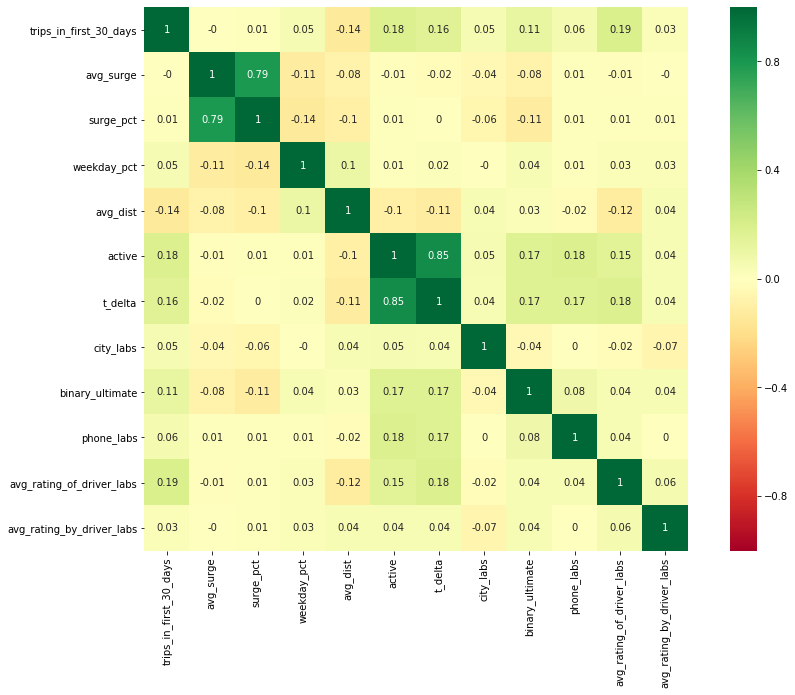

In [74]:
plt.figure(figsize=(15,10))
_=sns.heatmap(data.corr().round(2),square=True,annot=True,cmap='RdYlGn',vmin=-1, vmax=1)
# everything looks alright except a few reasonable problems
# surge_pct, avg_pct w/ each other and t_delta, active(target)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
x = data.drop(['active'],axis=1)

# features to float arrays
arr = np.array(x, dtype=float)

# vif dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
vif["features"] = x.columns
vif.sort_values(by='VIF',ascending=False)

# < 10-15 is the keep threshold, drop surge and rating

,VIF,features
1,38.672672,avg_surge
10,35.496028,avg_rating_by_driver_labs
9,5.847699,avg_rating_of_driver_labs
3,3.783888,weekday_pct
5,3.584935,t_delta
8,3.325558,phone_labs
6,2.654599,city_labs
2,2.586760,surge_pct
4,2.153739,avg_dist
7,1.700058,binary_ultimate


In [0]:
ult = data.drop(columns=['avg_rating_by_driver_labs', 'avg_surge'])

In [80]:
# redo vif

x = ult.drop(['active'],axis=1)
arr = np.array(x, dtype=float)

# vif df
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
vif["features"] = x.columns
vif.sort_values(by='VIF',ascending=False)

,VIF,features
8,4.378926,avg_rating_of_driver_labs
4,3.420342,t_delta
2,3.229461,weekday_pct
7,3.036660,phone_labs
5,2.382737,city_labs
3,1.947549,avg_dist
6,1.669928,binary_ultimate
0,1.478017,trips_in_first_30_days
1,1.184248,surge_pct


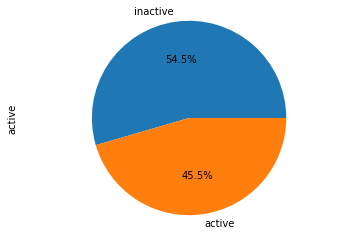

In [81]:
# the distribution does not require resampling 

_ = ult.active.value_counts().plot(kind='pie',labels=['inactive','active'],autopct='%1.1f%%')
_ = plt.axis('equal')
# no need for smote resampling

In [82]:
ult.describe()

,trips_in_first_30_days,surge_pct,weekday_pct,avg_dist,active,t_delta,city_labs,binary_ultimate,phone_labs,avg_rating_of_driver_labs
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,2.278200,8.849536,60.926084,5.796827,0.454900,92.790100,1.136040,0.37708,0.707480,3.852200
std,3.792684,19.958811,37.081503,5.707357,0.497967,62.129822,0.882558,0.48466,0.472013,1.800617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,33.300000,2.420000,0.000000,27.000000,0.000000,0.00000,0.000000,4.000000
50%,1.000000,0.000000,66.700000,3.880000,0.000000,110.000000,1.000000,0.00000,1.000000,5.000000
75%,3.000000,8.600000,100.000000,6.940000,1.000000,150.000000,2.000000,1.00000,1.000000,5.000000
max,125.000000,100.000000,100.000000,160.960000,1.000000,181.000000,2.000000,1.00000,2.000000,5.000000


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

#Modeling w/ Random Forest

In [0]:
X = ult.drop(['active'],axis=1)
y = ult['active']

In [102]:
X.columns

Index(['trips_in_first_30_days', 'surge_pct', 'weekday_pct', 'avg_dist',
       't_delta', 'city_labs', 'binary_ultimate', 'phone_labs',
       'avg_rating_of_driver_labs'],
      dtype='object')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)

In [0]:
# instantiate w/ 30-60 estimators 
rf = RandomForestClassifier(n_estimators=40, random_state=10)

# cross-validation 
cv_rf = cross_val_score(rf, X_train, y_train, cv=5,scoring='accuracy')

# train model
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

In [105]:
print("train accuracy:",format(np.mean(cv_rf),'.5f'))
print("test accuracy:",format(metrics.accuracy_score(y_test, y_pred),'.5f'))

train accuracy: 0.96203
test accuracy: 0.96200


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5448
           1       0.96      0.96      0.96      4552

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [0]:
from sklearn.metrics import roc_curve

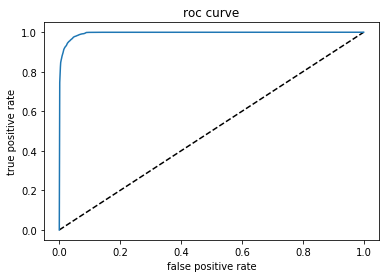

In [108]:
# compute predicted probabilities
y_pred_prob = rf.predict_proba(X_test)[:,1]

# generate rox curve w/ thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot roc
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc curve')
plt.show()

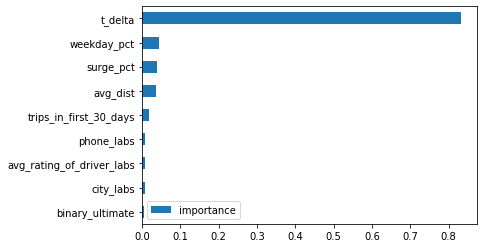

In [109]:
feature_imp_rf = pd.DataFrame(rf.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance',
                                                                          ascending=True)

feature_imp_rf.plot(kind='barh')
plt.show()

# remove t_delta and see what happens

In [0]:
X = ult.drop(['t_delta','active'],axis=1)
y = ult['active']

In [111]:
X.columns

Index(['trips_in_first_30_days', 'surge_pct', 'weekday_pct', 'avg_dist',
       'city_labs', 'binary_ultimate', 'phone_labs',
       'avg_rating_of_driver_labs'],
      dtype='object')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [0]:
# instantiate model to run 50 estimators on all processors
rf = RandomForestClassifier(n_estimators=40, random_state=14)

#Cross-validate on training se=-809\p
cv_rf = cross_val_score(rf, X_train, y_train, cv=5,scoring='accuracy')

# train model
rf.fit(X_train, y_train)

# predict on test data
y_pred = rf.predict(X_test)

In [114]:
print("train accuracy:",format(np.mean(cv_rf),'.5f'))
print("test accuracy:",format(metrics.accuracy_score(y_test, y_pred),'.5f'))

train accuracy: 0.71497
test accuracy: 0.71153


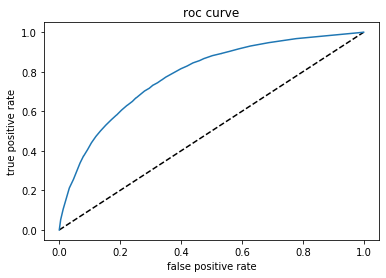

In [115]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc curve')
plt.show()

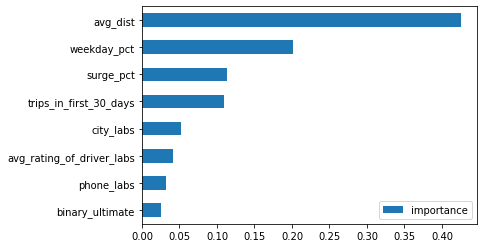

In [116]:
feature_imp_rf = pd.DataFrame(rf.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance',
                                                                          ascending=True)

feature_imp_rf.plot(kind='barh')
plt.show()

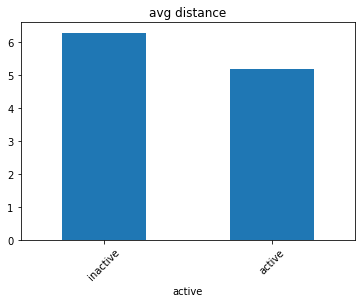

In [117]:
_ = ult.groupby('active')['avg_dist'].mean().plot(kind='bar')
_ = plt.title('avg distance')
_ = plt.xticks([0,1],['inactive','active'],rotation=45)

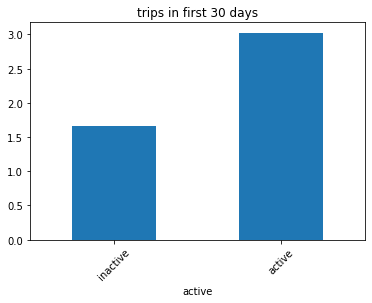

In [118]:
_ = ult.groupby('active')['trips_in_first_30_days'].mean().plot(kind='bar')
_ = plt.title('trips in first 30 days')
_ = plt.xticks([0,1],['inactive','active'],rotation=45)

#PART 3

In [119]:
'''
active users take more trips in the first 30 days
active users take short trips 
conversely inactive users take long trips less often 
'''

'\nactive users take more trips in the first 30 days\nactive users take short trips \nconversely inactive users take long trips less often \n'

#PART 2

In [120]:
'''
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: 
on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities. However, a toll 
bridge, with a two way toll, between the two cities causes driver partners to tend to be 
exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.


1. What would you choose as the key measure of success of this experiment in encouraging driver partners 
to serve both cities, and why would you choose this metric?
the key measure of success would be that the hypothesis of the experiment was correct. driver's 
preferences between cities are indistinguishable. so the metric would have to be targeted at 
driving frequency between cities and reimbursments costs. 

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in 
relation to the key measure of success. Please provide details on:
a. how you will implement the experiment?
two immediate methods come to mind. provide funds to the test group apriori or aposteriori. 
let the control group continue to pay their toll fees. 
b. what statistical test(s) you will conduct to verify the significance of the observation?
t-tests 
c. how you would interpret the results and provide recommendations to the city operations 
team along with any caveats?
the null hypothesis would be that the test control group are indistinguishable. do a two
sample t test with a .95 ci. if p <= .05, reject the null. drivers will have to be reimbursed.

'''


"\nThe neighboring cities of Gotham and Metropolis have complementary circadian rhythms: \non weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active\nduring the day. On weekends, there is reasonable activity in both cities. However, a toll \nbridge, with a two way toll, between the two cities causes driver partners to tend to be \nexclusive to each city. The Ultimate managers of city operations for the two cities have\nproposed an experiment to encourage driver partners to be available in both cities, by\nreimbursing all toll costs.\n\n\n1. What would you choose as the key measure of success of this experiment in encouraging driver partners \nto serve both cities, and why would you choose this metric?\nthe key measure of success would be that the hypothesis of the experiment was correct. driver's \npreferences between cities are indistinguishable. so the metric would have to be targeted at \ndriving frequency between cities and reimbursments costs. \n